In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

/Users/lilianwu/anaconda3/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from nltk.corpus import stopwords

In [3]:
strategy = pd.read_excel("data/RAW_FCM__Problems_and_Strategies_7.1.2019.xlsx")
strategy.columns = strategy.iloc[1]
strategy = strategy.iloc[2:]

In [4]:
strategy = strategy.iloc[:,[3,46,57]]
strategy = strategy.dropna()
strategy = strategy.rename(columns={'FCM: GRYD Client ID':'ID','Strategy recommended to address this problem_928':'Strategy','Progress made? (select one)_934':'Progress'})

In [5]:
strategy.head()

1,ID,Strategy,Progress
5,77th 1-16-40-2,CM will contact past employers with client to ...,Task/Service successfully completed
6,77th 1-16-45-1,speak to teacher about mother and refer client...,Task/Service successfully completed
7,77th 1-16-47-2,CM will work on getting tutoring services alon...,N/A - not applicable to this phase
8,77th 1-16-50-2,to mentor client with basic life skills and se...,A Little progress
13,77th 1-16-64-1,referred him to in-house services through SEA ...,A Little progress


In [6]:
len(strategy)

4039

Drop not applicable in the **Progress** column

In [7]:
drop = ['N/A - not applicable to this phase']
df = strategy[~strategy['Progress'].isin(drop)]
len(df)

3739

In [8]:
df = strategy

In [9]:
df.Progress.value_counts()

A Little progress                      1175
Some progress                           802
Task/Service successfully completed     788
Good progress                           490
N/A - not applicable to this phase      300
No progress                             247
Excellent progress                      237
Name: Progress, dtype: int64

In [10]:
# First category: 40 developmental assets (646)
strategy_list = df['Strategy'].tolist()
strategy_list = [s.lower() for s in strategy_list]

for i in range(len(strategy_list)):
    if '40 developmental assets' in strategy_list[i]:
        strategy_list[i] = 'developmental assets'
    elif '40 development assests' in strategy_list[i]:
        strategy_list[i] = 'developmental assets'
    elif '40 development asset' in strategy_list[i]:
        strategy_list[i] = 'developmental assets'
    elif '40 developmental' in strategy_list[i]:
        strategy_list[i] = 'developmental assets'
    elif '0 developmental' in strategy_list[i]:
        strategy_list[i] = 'developmental assets'
    elif '40 developemental asset' in strategy_list[i]:
        strategy_list[i] = 'developmental assets'

In [ ]:
#drop = ['N/A - not applicable to this phase']
#df = df[~df['To what extent has this strength blossomed? (select one)_916'].isin(drop)]

In [11]:
len(strategy_list)

4039

In [12]:
df['Strategy'] = strategy_list

In [ ]:
df_new = df[df['Strategy'] != '40 developmental assets']
len(df_new)

In [13]:
from string import punctuation
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [14]:
def normalize(contents):
    
    for i in range (len(contents)):
        contents[i]=contents[i].replace(",", " ")
    all_contents = [''.join([c for c in i if not c.isdigit()]) for i in contents]
    all_contents = [''.join([c for c in i if c not in punctuation]) for i in contents]
        
    lem_texts = []
    lemmatizer = WordNetLemmatizer()
    for i in all_contents:
        lem_texts.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(i)])
    new_texts = [' '.join([c for c in i]) for i in lem_texts] # a list of lemmatized sentences
    
    clean_tokens = list()
    sw = stopwords.words('english')
    #'cm','ciw', 'cm/ciw', 
    other = ['cm','ciw', 'cm/ciw', 'cmciw','client','clt','ct',
             '10','1012','120','12x','1x','2x','3x','30','2018','211','25','100',
             'week','hour','day','1st','25','430pm530pm',
             '5182015','54th','54th crenshaw','60','9month']
    sw = sw + other
    for i in range(0,len(new_texts)):
        clean_tokens.append(' '.join([w for w in word_tokenize(new_texts[i]) if w not in sw]))         
    return clean_tokens # a list of sentences without useless words

In [15]:
normalized_texts = normalize(strategy_list)

In [16]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
normalized_texts[1000:1010]

['drugalcohol awareness',
 'developmental asset',
 'developmental asset',
 'developmental asset',
 'developmental asset',
 'developmental asset',
 'developmental asset',
 'developmental asset',
 'developmental asset',
 'developmental asset']

In [62]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1,2))
# features are stored in X
X = tfidf.fit_transform(normalized_texts)

In [63]:
# feature names
terms = tfidf.get_feature_names()
terms

['aa',
 'aa class',
 'ability',
 'able',
 'able obtain',
 'able work',
 'abram',
 'abuse',
 'abuse anger',
 'abuse awareness',
 'abuse class',
 'abuse counsel',
 'abuse education',
 'abuse group',
 'abuse life',
 'abuse program',
 'abuse treatment',
 'abuse workshop',
 'academic',
 'academy',
 'accept',
 'accepted',
 'access',
 'access employment',
 'accomplish',
 'account',
 'accountability',
 'accountable',
 'accountable attend',
 'achieve',
 'acknowledge',
 'acquire',
 'acquire diploma',
 'act',
 'action',
 'action plan',
 'active',
 'activity',
 'activity complete',
 'activity effort',
 'activity involve',
 'activity keep',
 'activity offer',
 'activity order',
 'activity yes',
 'actually',
 'addition',
 'additional',
 'additional support',
 'address',
 'address behavior',
 'address issue',
 'address problem',
 'administrator',
 'adult',
 'adult school',
 'advantage',
 'advice',
 'advice need',
 'advice stressful',
 'advice time',
 'advise',
 'advisement',
 'advocacy',
 'advocacy c

In [64]:
tfidf_df = pd.DataFrame(X.todense(), 
                        columns=tfidf.get_feature_names())

In [65]:
tfidf_df.head()

aa  aa class  ability  able  able obtain  able work  abram  abuse  \
0  0.0       0.0      0.0   0.0          0.0        0.0    0.0    0.0   
1  0.0       0.0      0.0   0.0          0.0        0.0    0.0    0.0   
2  0.0       0.0      0.0   0.0          0.0        0.0    0.0    0.0   
3  0.0       0.0      0.0   0.0          0.0        0.0    0.0    0.0   
4  0.0       0.0      0.0   0.0          0.0        0.0    0.0    0.0   

   abuse anger  abuse awareness  abuse class  abuse counsel  abuse education  \
0          0.0              0.0          0.0            0.0              0.0   
1          0.0              0.0          0.0            0.0              0.0   
2          0.0              0.0          0.0            0.0              0.0   
3          0.0              0.0          0.0            0.0              0.0   
4          0.0              0.0          0.0            0.0              0.0   

   abuse group  abuse life  abuse program  abuse treatment  abuse workshop  \
0          0.0         0.0            0.0              0.0             0.0   
1          0.0         0.0            0.0              0.0             0.0   
2          0.0         0.0            0.0              0.0             0.0   
3          0.0         0.0            0.0              0.0             0.0   
4          0.0         0.0            0.0              0.0             0.0   

   academic  academy  accept  accepted  access  access employment  accomplish  \
0       0.0      0.0     0.0       0.0     0.0                0.0         0.0   
1       0.0      0.0     0.0       0.0     0.0                0.0         0.0   
2       0.0      0.0     0.0       0.0     0.0                0.0         0.0   
3       0.0      0.0     0.0       0.0     0.0                0.0         0.0   
4       0.0      0.0     0.0       0.0     0.0                0.0         0.0   

   account  accountability  accountable  accountable attend  achieve  \
0      0.0             0.0          0.0                 0.0      0.0   
1      0.0             0.0          0.0                 0.0      0.0   
2      0.0             0.0          0.0                 0.0      0.0   
3      0.0             0.0          0.0                 0.0      0.0   
4      0.0             0.0          0.0                 0.0      0.0   

   acknowledge  acquire  acquire diploma  act  action  action plan  active  \
0          0.0      0.0              0.0  0.0     0.0          0.0     0.0   
1          0.0      0.0              0.0  0.0     0.0          0.0     0.0   
2          0.0      0.0              0.0  0.0     0.0          0.0     0.0   
3          0.0      0.0              0.0  0.0     0.0          0.0     0.0   
4          0.0      0.0              0.0  0.0     0.0          0.0     0.0   

   activity  activity complete  activity effort  activity involve  \
0       0.0                0.0              0.0               0.0   
1       0.0                0.0              0.0               0.0   
2       0.0                0.0              0.0               0.0   
3       0.0                0.0              0.0               0.0   
4       0.0                0.0              0.0               0.0   

   activity keep  activity offer  activity order  activity yes  actually  \
0            0.0             0.0             0.0           0.0       0.0   
1            0.0             0.0             0.0           0.0       0.0   
2            0.0             0.0             0.0           0.0       0.0   
3            0.0             0.0             0.0           0.0       0.0   
4            0.0             0.0             0.0           0.0       0.0   

   addition  additional  additional support  address  address behavior  \
0       0.0         0.0                 0.0      0.0               0.0   
1       0.0         0.0                 0.0      0.0               0.0   
2       0.0         0.0                 0.0      0.0               0.0   
3       0.0         0.0                 0.0      0.0      

In [66]:
all(tfidf_df.iloc[0,:]==0)

False

In [67]:
row1 = tfidf_df.iloc[0,:]
row1[row1 != 0]

contact           0.266263
court             0.331296
employer          0.413983
get               0.235949
letter            0.418586
past              0.491797
recommendation    0.418586
Name: 0, dtype: float64

Implementing K means clustering algorithm

In [68]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

Find optimal number of clusters **k**

In [69]:
pca = PCA(n_components=2, random_state=25)
X_reduced= pca.fit_transform(X.toarray())
distortions = []
K = range(3, 10)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=25).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

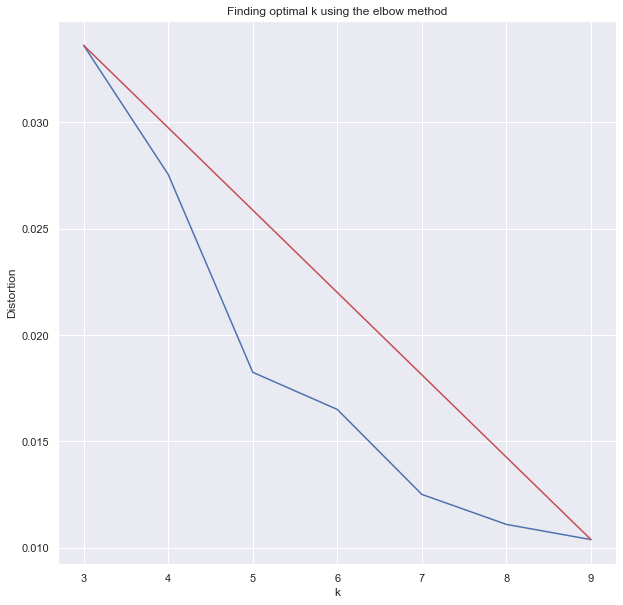

In [70]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# plot elbow method
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Finding optimal k using the elbow method')
plt.show()

In [71]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
tsne = TSNE(verbose=1, perplexity=100, random_state=25)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4039 samples in 0.446s...
[t-SNE] Computed neighbors for 4039 samples in 62.476s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4039
[t-SNE] Computed conditional probabilities for sample 2000 / 4039
[t-SNE] Computed conditional probabilities for sample 3000 / 4039
[t-SNE] Computed conditional probabilities for sample 4000 / 4039
[t-SNE] Computed conditional probabilities for sample 4039 / 4039
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.000961
[t-SNE] KL divergence after 1000 iterations: 1.833357


In [73]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

In [74]:
order_centroids

array([[ 779,  780,  168, ..., 2217, 2216,    0],
       [2596, 2697,  678, ..., 1735, 1734, 1419],
       [1533,  413,  171, ..., 2032, 2031,    0],
       [1632, 1637, 2757, ..., 2116, 2115,    0],
       [  60, 3022,   57, ..., 2213, 2212,    0]])

In [75]:
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 developmental
 developmental asset
 asset
 find tutor
 fitness class
 follow probation
 follow goal
 follow case
 follow
 focus school
Cluster 1:
 school
 service
 counsel
 refer
 provide
 class
 work
 engage
 employment
 receive
Cluster 2:
 job
 case
 assist
 case manager
 manager
 resume
 readiness
 job readiness
 search
 lead
Cluster 3:
 life
 life skill
 skill
 skill class
 mentor
 class
 provide mentor
 attend life
 provide
 attend
Cluster 4:
 advice time
 time stress
 advice
 stress
 time
 contact
 consistent contact
 consistent
 maintains
 provide advice


In [32]:
y_pred = model.fit_predict(X)

In [33]:
len(y_pred)

4039

In [34]:
df['Classification'] = y_pred

In [31]:
#labels ={0:"developmental asset", 1:"support/mentor", 2:"get ready for work/school", 
         #3: "life skill/anger management", 4:"counseling (employment etc)",
         #5:'substance abuse class'}
labels = {0:'get mentored for school/work', 1:'developmental asset', 
          2:'counseling service (employment etc)', 3:'job readiness', 
          4:'substance abuse/anger management/life skill'}



In [ ]:
# (2,2)
labels = {0:'substance abuse/anger management/life skill', 1:'assistance in job reply', 
          2:'40 developmental assets', 3: 'counseling/mentoring',
          4: 'counseling for employment/school'}

In [ ]:
# DON'T RUN
labels = {0:"developmental asset", 1:"support/mentor", 2:"get ready for work/school", 
         3: "life skill/anger management", 4:"counseling (employment etc)",
         5:'substance abuse class',
         6: 'sixth',
         7:'seventh'}

In [ ]:
df["Strategy_Label"] = df["Classification"].map(labels)

In [ ]:
df.head()

In [50]:
df = pd.read_csv('FCM_Problems_and_Strategies_with_labels.csv')

life skill/anger management    1847
substance abuse class           646
get ready for work/school       536
developmental asset             337
support/mentor                  230
counseling (employment etc)     143
Name: Strategy_Label, dtype: int64

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
X_embedded_all = X_embedded

sns.set(rc={'figure.figsize':(10,10)})

color_dict = dict({'get mentored for school/work':'darkviolet',
                  '40 developmental assets':'forestgreen',
                  'counseling service (employment etc)': 'orange',
                  'job readiness': 'springgreen',
                  'substance abuse/anger management/life skill': 'dodgerblue'})


sns.scatterplot(X_embedded_all[:,0], X_embedded_all[:,1], hue=df['Strategy_Label'].values, legend='full', palette=color_dict)
plt.title('Strategies with {} clusters'.format(k))
plt.show()

ValueError: arrays must all be same length

In [ ]:
df.to_csv('FCM_Problems_and_Strategies_with_labels8.csv', index=False)

In [ ]:
df['Strategy_Label'].value_counts()